In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
endpoint = 'https://www.datos.gov.co/resource/axk9-g2nh.json'

In [25]:
r = requests.get(endpoint)

In [33]:
r.status_code

200

In [35]:
data = r.json()


In [36]:
type(data)
        

list

Escogí este dataset debido a que estoy realizando una investigación sobre productos financieros en Colombia que permitan ayudar a los más desfavorecidos. Por lo tanto, este dataset me ayuda a complementar la información sobre las entidades a nivel nacional en Colombia y las tasas que cada una de ellas maneja.

In [31]:
tablaDatos = pd.json_normalize(data)
tablaDatos

,codificacion,tipoentidad,codigoentidad,nombreentidad,fechacorte,uca,nombre_unidad_de_captura,subcuenta,descripcion,tasa,monto
0,4410101100,1,13,BANCO BILBAO VIZCAYA ARGENTARIA COLOMBIA S.A. ...,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,100,ENTRE 121 Y 179 DIAS,11.02,215930.01
1,4410101070,1,23,BANCO DE OCCIDENTE S.A.,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,70,A 90 DIAS,14.54,23818648.52
2,4410101100,32,4,COTRAFA FINANCIERA,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,100,ENTRE 121 Y 179 DIAS,10.73,23059
3,4410101090,32,2,JFK COOPERATIVA FINANCIERA,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,90,A 120 DIAS,9.64,161745.84
4,4410101020,1,57,BANCO PICHINCHA S.A.,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,20,ENTRE 31 Y 44 DIAS,0.1,28445.92
...,...,...,...,...,...,...,...,...,...,...,...
995,4410105230,1,57,BANCO PICHINCHA S.A.,2020-10-22T00:00:00.000,5,COMPROMISOS DE TRANSFERENCIA EN OPERACIONES RE...,230,BANCO DE LA REPUBLICA,1.75,48000000
996,4410101090,32,2,JFK COOPERATIVA FINANCIERA,2019-08-14T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,90,A 120 DIAS,4.56,133905.48
997,4410101130,32,1,COOPERATIVA FINANCIERA DE ANTIOQUIA,2019-06-04T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,130,A 360 DIAS,6.51,148194
998,4410101140,4,26,TUYA S.A C.F,2019-04-23T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,140,SUPERIORES A 360 DIAS,5.83,380000


In [50]:
tablaDatos.head()

,codificacion,tipoentidad,codigoentidad,nombreentidad,fechacorte,uca,nombre_unidad_de_captura,subcuenta,descripcion,tasa,monto
0,4410101100,1,13,BANCO BILBAO VIZCAYA ARGENTARIA COLOMBIA S.A. ...,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,100,ENTRE 121 Y 179 DIAS,11.02,215930.01
1,4410101070,1,23,BANCO DE OCCIDENTE S.A.,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,70,A 90 DIAS,14.54,23818648.52
2,4410101100,32,4,COTRAFA FINANCIERA,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,100,ENTRE 121 Y 179 DIAS,10.73,23059
3,4410101090,32,2,JFK COOPERATIVA FINANCIERA,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,90,A 120 DIAS,9.64,161745.84
4,4410101020,1,57,BANCO PICHINCHA S.A.,2022-12-01T00:00:00.000,1,EMISIONES PUNTUALES Y RANGOS DE EMISION DE CDT,20,ENTRE 31 Y 44 DIAS,0.1,28445.92


Análisis descriptivo: voy a calcular las estadísticas descriptivas básicas de las tasas y montos de tasas, como la media, mediana, desviación estándar, mínimo y máximo. Esto te proporcionará una visión general de la distribución y variabilidad de los valores en ambas columnas.

In [61]:
import numpy as np
from tabulate import tabulate

# Obtener las tasas y los montos de tasas
tasas = [float(row['tasa']) for row in data]
montos_tasas = [float(row['monto']) for row in data]

# Calcular las estadísticas descriptivas
tasas_media = np.mean(tasas)
tasas_mediana = np.median(tasas)
tasas_desviacion = np.std(tasas)
tasas_minimo = np.min(tasas)
tasas_maximo = np.max(tasas)

montos_media = np.mean(montos_tasas)
montos_mediana = np.median(montos_tasas)
montos_desviacion = np.std(montos_tasas)
montos_minimo = np.min(montos_tasas)
montos_maximo = np.max(montos_tasas)

# Crear una tabla con los resultados
tabla_resultados = [
    ["Estadísticas de las tasas", tasas_media, tasas_mediana, tasas_desviacion, tasas_minimo, tasas_maximo],
    ["Estadísticas de los montos de tasas", montos_media, montos_mediana, montos_desviacion, montos_minimo, montos_maximo]
]

# Imprimir la tabla
headers = ["Variable", "Media", "Mediana", "Desviación Estándar", "Mínimo", "Máximo"]
print(tabulate(tabla_resultados, headers=headers, tablefmt="grid"))


+-------------------------------------+-------------+-----------+-----------------------+----------+----------+
| Variable                            |       Media |   Mediana |   Desviación Estándar |   Mínimo |   Máximo |
+=====================================+=============+===========+=======================+==========+==========+
| Estadísticas de las tasas           | 7.51377     |      5.74 |           5.06273     |     0.01 |   19.34  |
+-------------------------------------+-------------+-----------+-----------------------+----------+----------+
| Estadísticas de los montos de tasas | 5.27434e+07 | 926815    |           2.30954e+08 |   100    |    3e+09 |
+-------------------------------------+-------------+-----------+-----------------------+----------+----------+


Comparación de tasas entre entidades: aqui Comparo las tasas entre diferentes entidades financieras para identificar las diferencias en los niveles de tasas. 

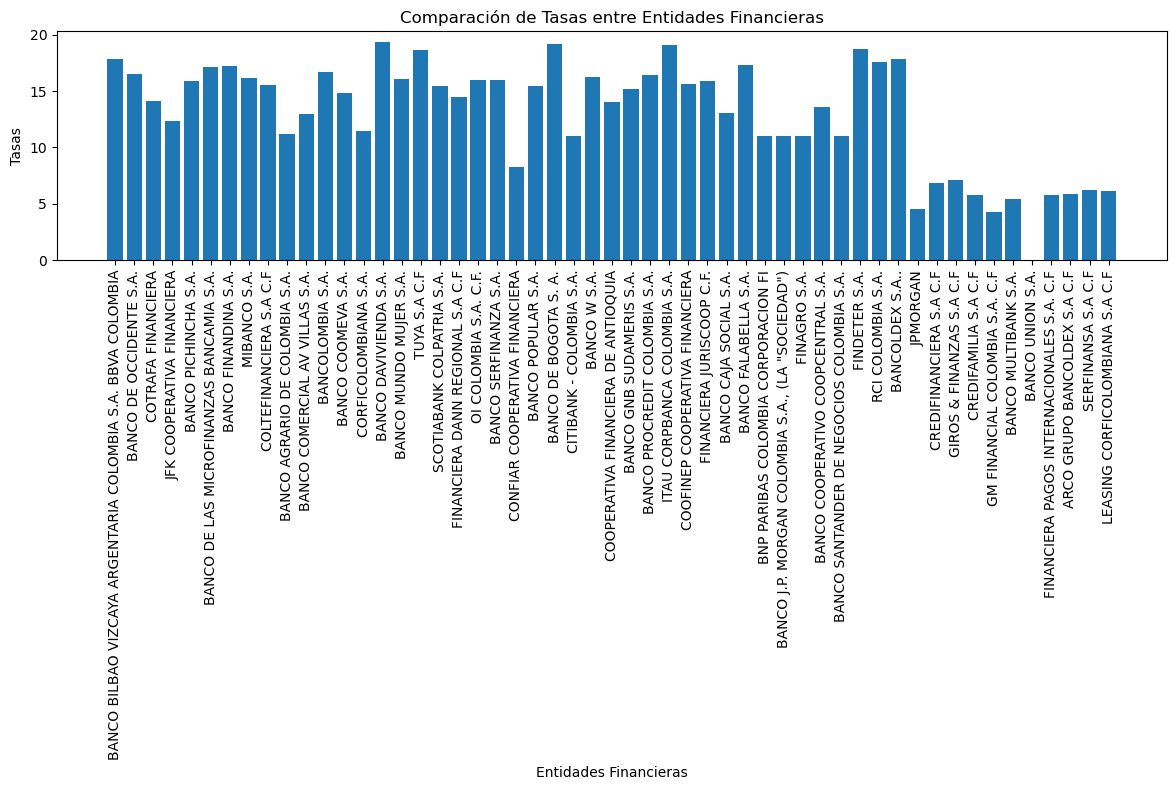

In [67]:
# Obtener los nombres de las entidades y las tasas
nombres_entidades = [row['nombreentidad'] for row in data]
tasas = [float(row['tasa']) for row in data]

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(nombres_entidades, tasas)
plt.xticks(rotation=90)
plt.xlabel('Entidades Financieras')
plt.ylabel('Tasas')
plt.title('Comparación de Tasas entre Entidades Financieras')

plt.tight_layout()
plt.show()

Segmentación de entidades: Agrupo las entidades financieras en diferentes segmentos o categorías según sus tasas y montos de tasas. Esto para identificar grupos o subconjuntos de entidades con características similares y comprender las diferencias entre ellos.

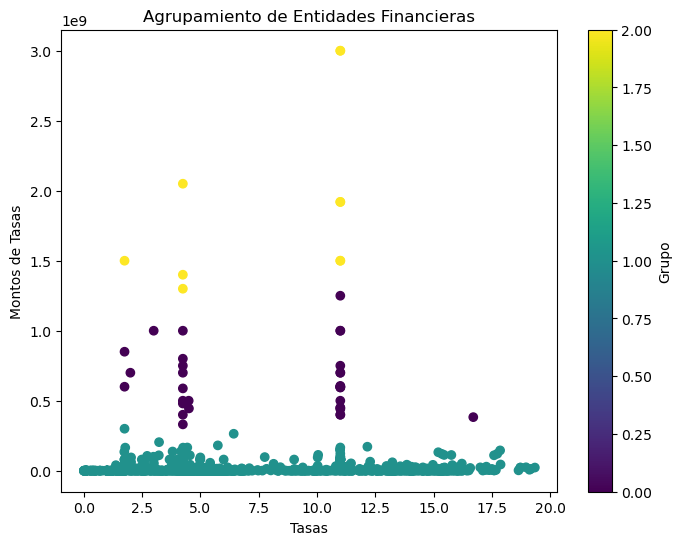

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Obtener las tasas y montos de tasas
tasas = [float(row['tasa']) for row in data]
montos_tasas = [float(row['monto']) for row in data]

# Crear una matriz de características
X = np.column_stack((tasas, montos_tasas))

# Definir el número de clusters (segmentos)
num_clusters = 3

# Aplicar el algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada entidad financiera
labels = kmeans.labels_

# Crear un gráfico de dispersión con diferentes colores para cada grupo
plt.figure(figsize=(8, 6))
plt.scatter(tasas, montos_tasas, c=labels, cmap='viridis')
plt.xlabel('Tasas')
plt.ylabel('Montos de Tasas')
plt.title('Agrupamiento de Entidades Financieras')
plt.colorbar(label='Grupo')
plt.show()